<a href="https://colab.research.google.com/github/AmaniBKL/Projects-ML/blob/main/Supervised_ML_Logistic_regression_TitanicDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
#import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
#import data
data = pd.read_csv('/TitanicDataSet.csv')

In [ ]:
#visualisation
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#verification
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I. Prepocessing 

In [ ]:
data = data.drop(['PassengerId'], axis=1)
data = data.drop(['Ticket'], axis=1)

In [ ]:
data['Fare'] = data['Fare'].astype(int)

In [ ]:
data['Cabin'] = data['Cabin'].fillna('X')
data['Cabin'] = data['Cabin'].astype(str).str[0]

In [ ]:
d = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "X": 8}
data['Cabin'] = data['Cabin'].map(d)

In [ ]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])

In [ ]:
data['Age'] = data['Age'].replace(np.nan, data.Age.mean())
data['Age'] = round(data['Age'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Survived'] = le.fit_transform(data['Survived'])

In [ ]:
sdict ={'Sex' : {'male':0, 'female':1} }
data.replace(sdict, inplace=True)

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7,8.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71,3.0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7,8.0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53,3.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8,8.0,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13,8.0,2
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30,2.0,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,30.0,1,2,23,8.0,2
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30,3.0,0


In [ ]:
data['Title'] = data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
data.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Mme               1
Lady              1
Ms                1
Don               1
Sir               1
Jonkheer          1
Capt              1
Name: Title, dtype: int64

In [ ]:
data.drop('Name',axis=1, inplace=True)

In [ ]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" ,

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs" ,

                    "Master" :    "Master"

                    }

In [ ]:
data['Title']=data.Title.replace(Title_Dictionary)

In [ ]:
titles = {"Officer": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royalty": 5}
data['Title'] = data['Title'].map(titles)

In [ ]:
#verification
data.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7,8.0,2,3
1,1,1,1,38.0,1,0,71,3.0,0,3
2,1,3,1,26.0,0,0,7,8.0,2,2
3,1,1,1,35.0,1,0,53,3.0,2,3
4,0,3,0,35.0,0,0,8,8.0,2,3
5,0,3,0,30.0,0,0,8,8.0,1,3
6,0,1,0,54.0,0,0,51,5.0,2,3
7,0,3,0,2.0,3,1,21,8.0,2,4
8,1,3,1,27.0,0,2,11,8.0,2,3
9,1,2,1,14.0,1,0,30,8.0,0,3


In [ ]:
data['Family_size'] = data['SibSp'] + data['Parch'] + 1

In [ ]:
#verification
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_size
0,0,3,0,22.0,1,0,7,8.0,2,3,2
1,1,1,1,38.0,1,0,71,3.0,0,3,2
2,1,3,1,26.0,0,0,7,8.0,2,2,1
3,1,1,1,35.0,1,0,53,3.0,2,3,2
4,0,3,0,35.0,0,0,8,8.0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13,8.0,2,1,1
887,1,1,1,19.0,0,0,30,2.0,2,2,1
888,0,3,1,30.0,1,2,23,8.0,2,2,4
889,1,1,0,26.0,0,0,30,3.0,0,3,1


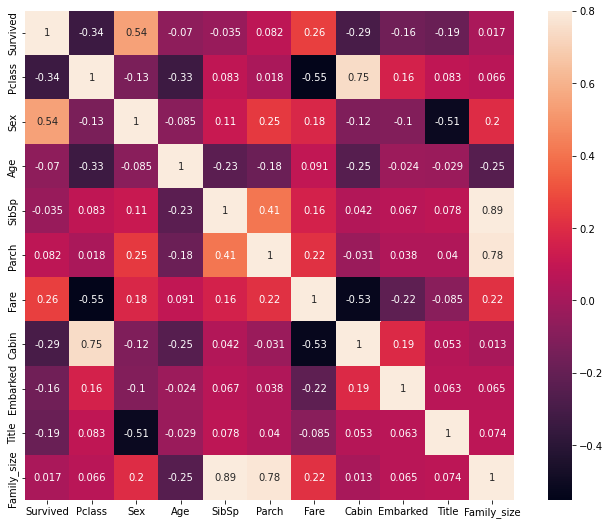

In [ ]:
#correlation
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True, vmax=.8, annot=True)

II. Logistic regression

In [ ]:
#features extraction
x = data[['Sex','Fare']]
y = data['Survived']

In [ ]:
#splitting data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
#build our logistic model
logr = LogisticRegression()

#fitting training data  
logr.fit(x_train, y_train)  

#testing model’s performance
y_pred  = logr.predict(x_test)

#testing model’s performance    
print("Accuracy={:.2f}".format(logr.score(x_test, y_test)))

Accuracy=0.78


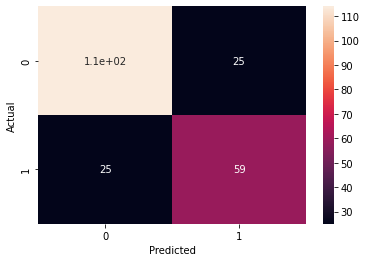

In [ ]:
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#predict probabilities
pred_prob = logr.predict_proba(x_test)

#roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

#roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.8536313806097978


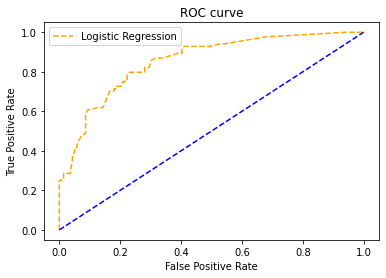

In [ ]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()